## LAb9.Employee Hopping Prediction Using Random Forests

### STEP 1:

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Employee_hopping.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely      

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [10]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

### STEP 2:

In [12]:
x=df.drop(['Attrition'],axis=1)

In [13]:
y=df.Attrition

In [14]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,...,3,80,0,8,2,2,7,7,3,6
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,...,1,80,3,12,3,2,1,0,0,0
7,30,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,...,2,80,1,1,2,3,1,0,0,0
8,38,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,...,2,80,0,10,2,3,9,7,1,8
9,36,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,...,2,80,2,17,3,2,7,7,7,7


In [15]:
y

0       Yes
1        No
2       Yes
3        No
4        No
5        No
6        No
7        No
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21      Yes
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29       No
       ... 
1440     No
1441     No
1442    Yes
1443     No
1444    Yes
1445     No
1446     No
1447     No
1448     No
1449     No
1450     No
1451     No
1452    Yes
1453     No
1454     No
1455     No
1456     No
1457     No
1458     No
1459     No
1460     No
1461    Yes
1462     No
1463     No
1464     No
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [16]:
y=y.apply(lambda x:1 if x=='Yes' else 0)
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### STEP 3:

In [17]:
df= pd.get_dummies(df,columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0


### STEP 4:

In [18]:
x=df.drop(['Attrition'],axis=1)

In [19]:
x.shape

(1470, 55)

In [20]:
y.shape

(1470,)

### STEP 5:

In [21]:
from sklearn.model_selection import train_test_split as ts
x_train,x_test,y_train,y_test=ts(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier as rf
RFC=rf(n_estimators=100,max_features=0.3)

In [23]:
RFC.fit(x_train,y_train)

RandomForestClassifier(max_features=0.3)

In [24]:
RFC_y_pred=RFC.predict(x_test)
RFC_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Step6:Testing

In [25]:
from sklearn.metrics import accuracy_score,classification_report

In [26]:
RFC_acc = accuracy_score(y_test,RFC_y_pred)
RFC_acc

0.8741496598639455

In [27]:
print(classification_report(y_test, RFC_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.62      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.85      0.87      0.84       294



### Step7:Feature importance value

In [28]:
print(RFC.feature_importances_)

[0.05660288 0.04629798 0.03936233 0.01594369 0.         0.04421155
 0.02486687 0.03837112 0.01922363 0.02643464 0.02254161 0.08540544
 0.04209282 0.03302125 0.02596365 0.00416767 0.01635318 0.
 0.03011693 0.0497866  0.020667   0.01846795 0.03907382 0.02104304
 0.02380929 0.03006876 0.00322044 0.01406064 0.00597268 0.00208325
 0.00630693 0.00887464 0.00171943 0.00607428 0.00593541 0.00645431
 0.00328183 0.00546498 0.00336883 0.0055279  0.00137601 0.00303903
 0.0049376  0.00073885 0.00258806 0.00052164 0.00623249 0.00894495
 0.00540715 0.00411965 0.00551288 0.02249637 0.         0.03402932
 0.04781677]


In [30]:
feature_name = pd.DataFrame(RFC.feature_importances_, index=x_train.columns, columns=["Important_feature"])
feature_name

,Important_feature
Age,0.056603
DailyRate,0.046298
DistanceFromHome,0.039362
Education,0.015944
EmployeeCount,0.000000
EmployeeNumber,0.044212
EnvironmentSatisfaction,0.024867
HourlyRate,0.038371
JobInvolvement,0.019224
JobLevel,0.026435


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

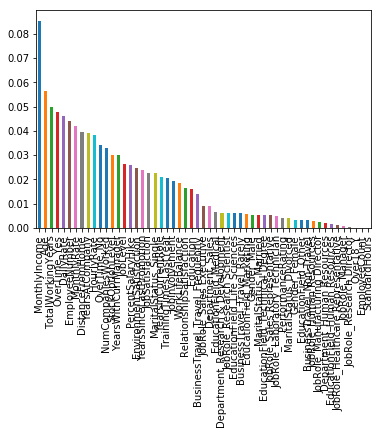

In [34]:
pd.Series(RFC.feature_importances_, index=x_train.columns).sort_values(ascending=False).plot(kind='bar')

### Step8:

In [35]:
estimator = RFC.estimators_[5]

In [39]:
!pip install graphviz


In [51]:
with open("tree.dot",'w') as f:
    f = tree.export_graphviz(estimator, out_file = f, max_depth = 4, impurity=False,feature_names = X.columns.values,
        class_names=['Yes', 'No'], filled=True)

In [52]:
!type tree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="OverTime_Yes <= 0.5\nsamples = 738\nvalue = [998, 178]\nclass = Yes", fillcolor="#ea975c"] ;
1 [label="MonthlyIncome <= 1451.5\nsamples = 531\nvalue = [765, 78]\nclass = Yes", fillcolor="#e88e4d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="MaritalStatus_Married <= 0.5\nsamples = 9\nvalue = [4, 9]\nclass = No", fillcolor="#91c9f1"] ;
1 -> 2 ;
3 [label="JobRole_Research Scientist <= 0.5\nsamples = 7\nvalue = [1, 9]\nclass = No", fillcolor="#4fa8e8"] ;
2 -> 3 ;
4 [label="samples = 6\nvalue = [0, 9]\nclass = No", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="samples = 1\nvalue = [1, 0]\nclass = Yes", fillcolor="#e58139"] ;
3 -> 5 ;
6 [label="samples = 2\nvalue = [3, 0]\nclass = Yes", fillcolor="#e58139"] ;
2 -> 6 ;
7 [label="Age <= 32.5\nsamples = 522\nvalue = [761, 69]\nclass = Yes", fillcolor="#e78c4b"] ;
1 -> 7 ;
8 [label="HourlyRate <= 99.5\nsamples = 200\nvalue = [274, 47]\nclass = Ye

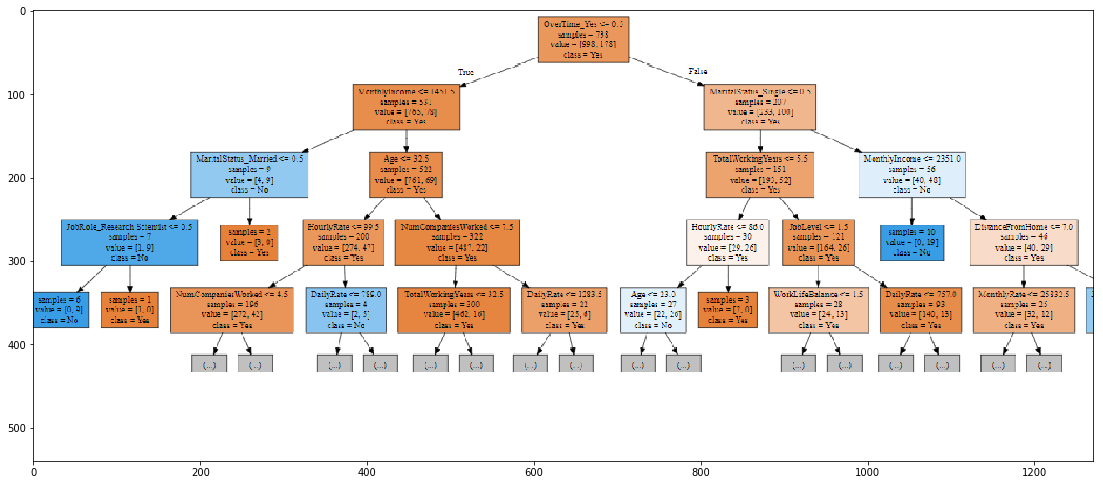

In [71]:
import matplotlib.pyplot as plt
image = plt.imread('RFDC.png')
plt.figure(figsize=(19,15))
plt.imshow(image)

### STEP- 9:RF WITH A RANGE OF TREES

In [54]:
rf2 = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True, n_jobs=-1)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    rf2.set_params(n_estimators=n_trees)
    rf2.fit(x_train, y_train)
    oob_error = 1 - rf2.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions

,oob
n_trees,
15.0,0.163265
20.0,0.159014
30.0,0.148810
40.0,0.144558
50.0,0.139456
100.0,0.140306
150.0,0.138605
200.0,0.140306
300.0,0.137755


### Step10.Plot oob-error for each tree

[Text(0,0.5,'out-of-bag error')]

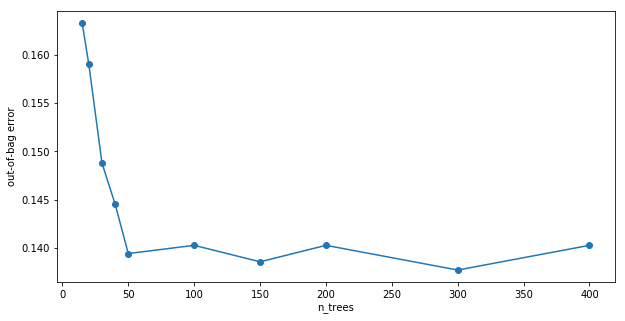

In [55]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10,5))
ax.set(ylabel='out-of-bag error')

### STEP- 11 COMPARE WITH DECISION TREE CLASSIFIER

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [59]:
y_pred1 = clf.predict(x_test)
y_pred1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
from sklearn import tree
from sklearn.tree import export_graphviz
with open("DTC2.dot", 'w') as f:
    f = tree.export_graphviz(clf,out_file=f,max_depth = 4,impurity = False,feature_names=X.columns.values,
                          class_names=['Yes', 'No'], filled=True)

In [61]:
!type tree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="OverTime_Yes <= 0.5\nsamples = 738\nvalue = [998, 178]\nclass = Yes", fillcolor="#ea975c"] ;
1 [label="MonthlyIncome <= 1451.5\nsamples = 531\nvalue = [765, 78]\nclass = Yes", fillcolor="#e88e4d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="MaritalStatus_Married <= 0.5\nsamples = 9\nvalue = [4, 9]\nclass = No", fillcolor="#91c9f1"] ;
1 -> 2 ;
3 [label="JobRole_Research Scientist <= 0.5\nsamples = 7\nvalue = [1, 9]\nclass = No", fillcolor="#4fa8e8"] ;
2 -> 3 ;
4 [label="samples = 6\nvalue = [0, 9]\nclass = No", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="samples = 1\nvalue = [1, 0]\nclass = Yes", fillcolor="#e58139"] ;
3 -> 5 ;
6 [label="samples = 2\nvalue = [3, 0]\nclass = Yes", fillcolor="#e58139"] ;
2 -> 6 ;
7 [label="Age <= 32.5\nsamples = 522\nvalue = [761, 69]\nclass = Yes", fillcolor="#e78c4b"] ;
1 -> 7 ;
8 [label="HourlyRate <= 99.5\nsamples = 200\nvalue = [274, 47]\nclass = Ye

In [63]:
print("Accuracy of test :",clf.score(x_test,y_test))

Accuracy of test : 0.9183673469387755


In [64]:
print(classification_report(y_test,RFC_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.62      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.85      0.87      0.84       294



In [68]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score,f1_score

In [69]:
print("RF model :",accuracy_score(y_test,RFC_y_pred))
print("RF Precision:",precision_score(y_test,RFC_y_pred))
print("RF Recall :",recall_score(y_test,RFC_y_pred))
print("RF F1 score :",f1_score(y_test,RFC_y_pred))
print("\n")
print("DT model :",accuracy_score(y_test,y_pred1))
print("DT Precision:",precision_score(y_test,y_pred1))
print("DT Recall :",recall_score(y_test,y_pred1))
print("DT F1 score :",f1_score(y_test,y_pred1))

RF model : 0.8741496598639455
RF Precision: 0.625
RF Recall : 0.1282051282051282
RF F1 score : 0.21276595744680848


DT model : 0.9183673469387755
DT Precision: 1.0
DT Recall : 0.38461538461538464
DT F1 score : 0.5555555555555556
